In [1]:
#installa the required libraries
import pandas as pd
from sklearn.model_selection import train_test_split #split the data into train and test
from sklearn.preprocessing import StandardScaler,LabelEncoder #for standarize the data and categorical variables.
import pickle

In [2]:
## Load the dataset
data=pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
## Preprocess the data
### Drop irrelevant columns
data=data.drop(['RowNumber','CustomerId','Surname'],axis=1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [12]:
## Encode categorical variables
label_encoder_gender=LabelEncoder()
data['Gender']=label_encoder_gender.fit_transform(data['Gender'])
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [13]:
## Onehot encode 'Geography
from sklearn.preprocessing import OneHotEncoder 
onehot_encoder_geo=OneHotEncoder() #create the object
geo_encoder=onehot_encoder_geo.fit_transform(data[['Geography']]).toarray() #perform one-hot encoding in array format
geo_encoder

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [14]:
Onehotcolumns=onehot_encoder_geo.get_feature_names_out(['Geography']) #get the column names

In [15]:
geo_encoded_df=pd.DataFrame(geo_encoder,columns=Onehotcolumns) #create a dataframe
geo_encoded_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [16]:
## Combine one hot encoder columns with the original data
data=pd.concat([data.drop('Geography',axis=1),geo_encoded_df],axis=1)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [17]:
## Save the encoders and sscaler because we will need them later for inference
with open('label_encoder_gender.pkl','wb') as file: #creating a new pkl file
    pickle.dump(label_encoder_gender,file)

with open('onehot_encoder_geo.pkl','wb') as file:
    pickle.dump(onehot_encoder_geo,file)


In [18]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [19]:
## DiVide the dataset into indepent and dependent features
X=data.drop('Exited',axis=1)
y=data['Exited']

## Split the data in training and tetsing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## here we are gonna stadardize the data, this means removing the mean and scaling to unit variance
scaler=StandardScaler() #then we are gona save this in a pkl file
X_train=scaler.fit_transform(X_train) #fit and transform the training data
X_test=scaler.transform(X_test)


In [20]:
X_train

array([[ 0.35649971,  0.91324755, -0.6557859 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.91324755,  0.29493847, ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.96147213,  0.91324755, -1.41636539, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -1.09499335, -0.08535128, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.47065475,  0.91324755,  1.15059039, ..., -0.99850112,
         1.72572313, -0.57638802]])

In [21]:
#let´s save this scalar file into a pkl file.
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

In [22]:
data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


### Now, we are going to make the ANN Implementation

In [23]:
#we are going to build a neural network using tensorflow and keras
import tensorflow as tf
from tensorflow.keras.models import Sequential #to create the model
from tensorflow.keras.layers import Dense #to create the layers
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime

In [24]:
(X_train.shape[1],) #input shape

(12,)

In [25]:
## Build Our ANN Model
#Here we are going to build a sequential model with 2 hidden layers and one output layer, 
# Hl1 AND HL2 are using relu activation function and the output layer is using SIGMOND activation function because this is a BINARY CLASSIFICATION problem.

model=Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)), ## HL1 Connected wwith input layer, the fist hidden layer has 64 neurons
    Dense(32,activation='relu'), ## HL2, the second hidden layer has 32 neurons, #RELU activation function is because this is a hidden layer
    Dense(1,activation='sigmoid')  ## output layer
]

)

d:\DS and ML BOOTCAMP\PYTHON\52. Deep Learning\ANN Bank classification\venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


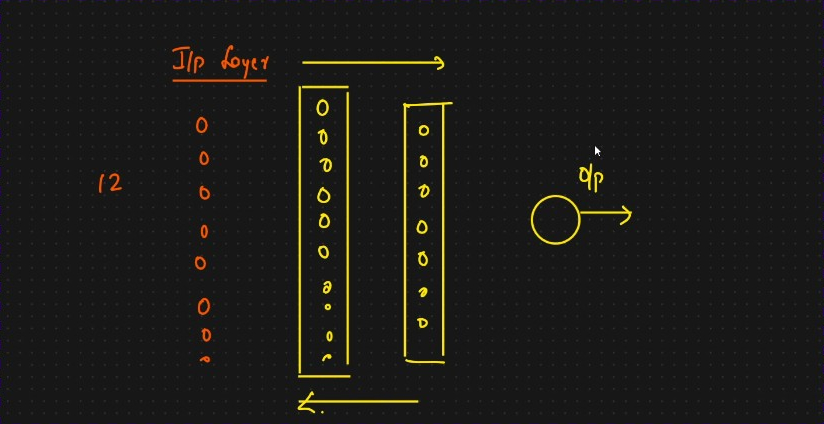


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

Let´s set up the optimizar and the loss function. 
 This is a crucial step before compiling the model, as it defines how the network learns from the data during training.

In [ ]:
import tensorflow
#Adam optimizer (modify the learnign rate and the weights). Adam (Adaptive Moment Estimation) is a popular optimization algorithm 
# that combines the benefits of two other methods: AdaGrad and RMSProp
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01) #Learning rate is 0.01

#BinaryCrossentropy loss function object. This loss is specifically designed for binary classification tasks,
#like predicting whether a bank customer will churn (exit) or not
loss=tensorflow.keras.losses.BinaryCrossentropy()
loss

<LossFunctionWrapper(<function binary_crossentropy at 0x00000243B3BF65C0>, kwargs={'from_logits': False, 'label_smoothing': 0.0, 'axis': -1})>

In [ ]:
## compile the model
model.compile(optimizer=opt,loss="binary_crossentropy",metrics=['accuracy']) #metrics is accuracy because this is a classification problem

In [ ]:
## Set up the Tensorboard
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
#early stopping to prevent overfitting
#tensorboard to visualize the training process

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") #create a unique log directory based on the current date and time
tensorflow_callback=TensorBoard(log_dir=log_dir,histogram_freq=1) #set histogram_freq=1 to enable histogram computation for the layers in the model every epoch

The early_stopping_callback is an instance of TensorFlow/Keras' EarlyStopping class. It acts as a safeguard during model training by watching a specified metric and stopping the process when that metric ceases to improve. In your case, it's set to monitor 'val_loss', which is the loss on the validation dataset

In [ ]:
## Set up Early Stopping
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True) 
#val_loss is monitored, if it does not improve for 10 epochs, training will stop and the best weights will be restored


  #epochs=100,meaning the model will go through the entire training dataset 100 times

In [ ]:
### Train the model
history=model.fit(
    X_train,y_train,validation_data=(X_test,y_test),epochs=100, #here epochs is 100 but with early stopping it will stop before if no improvement
  
    callbacks=[tensorflow_callback,early_stopping_callback] #calling the callbacks
)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8367 - loss: 0.3939 - val_accuracy: 0.8425 - val_loss: 0.3788
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8581 - loss: 0.3550 - val_accuracy: 0.8605 - val_loss: 0.3541
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8593 - loss: 0.3468 - val_accuracy: 0.8590 - val_loss: 0.3435
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8574 - loss: 0.3432 - val_accuracy: 0.8585 - val_loss: 0.3481
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8619 - loss: 0.3417 - val_accuracy: 0.8580 - val_loss: 0.3511
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8589 - loss: 0.3407 - val_accuracy: 0.8610 - val_loss: 0.3391
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8602 - loss: 0.3399 - val_accuracy: 0.8570 - val_loss: 0.3614
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8614 - loss: 0.3379 - val_accu

#save the model in h5 format, because it is a standard format for saving keras models

In [ ]:
model.save('model.h5') 

Dashboard in tensorflow about the model= Tensorboard:

In [36]:
## Load Tensorboard Extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [37]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 9000), started 2:25:11 ago. (Use '!kill 9000' to kill it.)

In [35]:
### Load the pickle file
